# 仮説に基づいたデータ解析における先入観の弊害

まず、以下のリンクから2つのデータをダウンロードしましょう。

- data9b_m.txt：<https://www.dropbox.com/s/r3wyn2ex20glsoa/data9b_m.txt?dl=0>
- data9b_w.txt：<https://www.dropbox.com/s/685pkte3n3879mn/data9b_w.txt?dl=0>

データには男女別のBMIと一日平均歩数が並んでいます (`data9b_m.txt`が男性、`data9b_w.txt`が女性のデータです)。このデータに対して次の**3つの仮説**を検証してみましょう。

a) 男女別に歩数の平均の差がある  
b) 女性では歩数とBMIは負の相関である   
c) 男性では正の相関である  

## 仮説に基づいたデータ解析の実践
### データの読み込み

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset_male = pd.read_csv("data9b_m.txt", sep="\t")
dataset_female = pd.read_csv("data9b_w.txt", sep="\t")

後で描画するためにそれぞれのデータに`sex`という行を追加し、データを結合します。

In [3]:
dataset_male['sex'] = "male"
dataset_female['sex'] = "female"

In [4]:
dataset = pd.concat([dataset_male, dataset_female])

データを見てみましょう。

In [5]:
dataset

,ID,steps,bmi,sex
0,1,15000,16.9,male
1,2,15000,16.9,male
2,6,14861,16.8,male
3,7,14861,16.8,male
4,8,14699,17.3,male
...,...,...,...,...
916,1782,162,30.3,female
917,1783,162,30.4,female
918,1784,162,30.3,female
919,1785,162,30.3,female


### 歩数の平均の差

初めに生データを見ておきましょう。

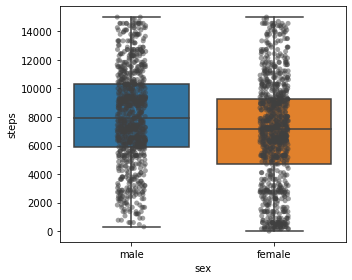

In [6]:
plt.figure(figsize=(5, 4))
sns.boxplot(x="sex", y="steps", data=dataset)
sns.stripplot(x="sex", y="steps", data=dataset, alpha=.5, color=".25")
plt.tight_layout()

男性の方が一日平均歩数の平均は多いです。次にt検定を用いて歩数の平均に有意差が存在するか検討します。

In [7]:
from scipy import stats

In [8]:
t, p = stats.ttest_ind(dataset_male.steps, dataset_female.steps, equal_var = False)

In [9]:
p

1.0553796938341748e-11

p < 0.05であり、一先ず男女の歩数には有意差があると考えてよいでしょう。

### 歩数とBMIの相関
次に歩数とBMIの相関を調べましょう。歩数が多ければそれだけ運動しているということでBMIは減少しそうです。そのため、どちらも負の相関がでるのではという予想は立てられます。

ただし、ここで`np.corrcoef`などの相関係数を求める関数をいきなり使うべきではありません。自分は相関を出す際には必ず生データを見るようにしています。これは外れ値の存在や非線形の関係が無いかを確認しなければ相関を出すことに意味がないためです (cf. [同じ基本統計量・異なる散布図のデータセットを焼きなまし法で生成する](https://oumpy.github.io/blog/2020/07/samestats.html))。

そのため先に生データを描画してみましょう。これには`sns.regplot`が便利です。

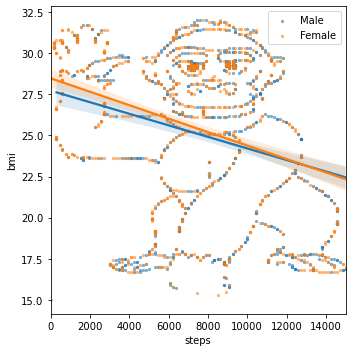

In [10]:
plt.figure(figsize=(5, 5))
sns.regplot(x="steps", y="bmi", data=dataset_male, scatter_kws={'alpha':0.5, "s": 5}, label="Male")
sns.regplot(x="steps", y="bmi", data=dataset_female, scatter_kws={'alpha':0.5, "s": 5}, label="Female")
plt.legend()
plt.tight_layout()

歩数とBMIは男女共に負の相関となりそうですが、**明らかにゴリラが見えます**。この辺りでこのデータは実際のデータではなく人工データであることに気づくわけです。

## 種明かし

結論から言えば、これは**先入観を持ってデータ解析を行うと注意力が低下する**という話です。これまで解析してきたのは実際に行われた研究 ([Yanai & Lercher, 2020](https://www.biorxiv.org/content/10.1101/2020.07.30.228916v1)) で用いられたデータセットであり、Yanaiらはある大学の学生にデータを渡し、2つの群に分けて解析をしてもらいました。

一つの群（仮説あり群）にはこれまで考えてきた3つの仮説が正しいか検証せよと説明しました。（以下は実際の指示です）
> Download the two files data9b_w.txt and data9b_m.txt. Each row in both files contains for one person (women in data9b_w.txt, men in data9b_m.txt9) the number of steps that this person took on a particular day (steps) and the body mass index (bmi). Assume that both traits are normally distributed for males and for females. Consider the following (alternative, not null)
hypotheses:  
a) There is a difference in the mean number of steps between women and men.  
b) The correlation coefficient between steps and bmi is negative for women.  
c) The correlation coefficient between steps and bmi is positive for men.  
Think about which test to use and calculate the corresponding P-value.Which other conclusions can you draw from the data?

もう片方の群（仮説なし群）の学生にはただこのデータを解析しなさいと伝えました。（以下は実際の指示です）

> Download the two files data9b_w.txt and data9b_m.txt. Each row in both files contains for one person (women in data9b_w.txt, men in data9b_m.txt9) the number of steps that this person took on a particular day (steps) and the body mass index (bmi). Assume that both traits are normally distributed for males and for females. Examine the data appropriately! What do you notice? What conclusions can you draw from the data?

データ点をplotすると上で見たようにゴリラが隠れているのですが、仮説を与えられた群の学生は与えられていない学生に比べて有意に発見した学生が少なかったようです。もちろん仮説を立てず、むやみやたらにデータ解析を行うということは通常行うことではありません。しかし、仮説を設定すると先入観が生じてしまいデータ解析における視野を狭めてしまう可能性がある、という点には注意した方がよいということですね。

ちなみになぜゴリラかというと、恐らく[The Invisible Gorilla](https://en.wikipedia.org/wiki/The_Invisible_Gorilla)が元になっていると思われます。The Invisible Gorillaは注意力を測る心理実験で、複数人でバスケットボールをパスし合う動画を見せ、白いシャツを着たプレーヤーがボールをパスした回数を被験者に数えさせます。実は動画の途中でゴリラが乱入してくるのですが、これに気づかない人が多く存在するようです (自動車教習所で自分は見せられた記憶があります。自分は既知だったので暇でしたが…)。

## 参考文献
- データのリンクは著者(@ItaiYanai氏)のツイッターより取得：<https://twitter.com/ItaiYanai/status/1301977485693931521?s=20>
- Yanai, I. & Lercher, M. [Selective attention in hypothesis-driven data analysis](https://www.biorxiv.org/content/10.1101/2020.07.30.228916v1). *bioRxiv*. 2020.
- Yanai, I. & Lercher, M. [A hypothesis is a liability](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-02133-w). *Genome Biology*. 2020.